# Patent analyses

Conduct analyses to replicate all figures. This notebook produces results for patent (i.e., Patents View) data.

# Preliminaries

In [1]:
# load some packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import config

In [2]:
# font
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

# Load the data

In [3]:
# load patentsview_df
patentsview_df = pd.read_csv(config.DATA_PATH + "analytical/patentsview_analytical_df.csv.gz",
                             dtype={"field_nber_category_id":str},
                             low_memory=False)  

In [4]:
# load normalized measures
patentsview_cdindex_normalized_analytical_df = pd.read_csv(config.DATA_PATH + "analytical/patentsview_cdindex_normalized_analytical_df.csv.gz",
                                                           low_memory=False)

In [5]:
# load bornmann measures
patentsview_cdindex_bornmann_analytical_df = pd.read_csv(config.DATA_PATH + "analytical/patentsview_cdindex_bornmann_analytical_df.csv.gz",
                                                         low_memory=False)

In [6]:
# load patentsview_category_panel_general_df
patentsview_category_panel_general_df = pd.read_csv(config.DATA_PATH + "analytical/patentsview_category_panel_general_analytical_df.csv.gz",
                                                    dtype={"category_id":str},
                                                    low_memory=False) 

In [7]:
# load unified_cdindex_df
unified_cdindex_df = pd.read_csv(config.DATA_PATH + "analytical/unified_cdindex_df.csv.gz",
                                 low_memory=False)

In [8]:
# load top verbs data
patent_tokens_table_df = pd.read_csv(config.DATA_PATH + "analytical/patent_tokens_table_analytical_df.csv.gz",
                                     low_memory=False)

In [9]:
# load stata margins results
patents_regadj_m4_df = pd.read_stata(config.DATA_PATH 
                                     + "analytical/patents_regression_adjustments_m4.dta").rename(columns={"_m1": "year",
                                                                                                           "_margin": "cd_5_adj",
                                                                                                           "_ci_lb": "ci_lower",
                                                                                                           "_ci_ub": "ci_upper"})

In [10]:
# load shapley decomposition results
shapley_decomposition_df = pd.read_csv(config.DATA_PATH + "analytical/shapley_decomposion_results.csv.gz",
                                       low_memory=False)

In [11]:
# load rewired cd index results
patentsview_rewired_df = pd.read_csv(config.DATA_PATH + "analytical/patentsview_cdindex_rewired_analytical_df.csv.gz",
                                     low_memory=False)

# Clean up

In [12]:
# format field names
patentsview_df = patentsview_df.replace({"field_nber_category_id": config.NBER_CATEGORY_ID_NAMES})
patentsview_category_panel_general_df = patentsview_category_panel_general_df.replace({"category_id": config.NBER_CATEGORY_ID_NAMES})

In [13]:
# drop small and missing category_ids for visuals
patentsview_df = patentsview_df[~patentsview_df.field_nber_category_id.isnull()]
patentsview_df = patentsview_df[patentsview_df.field_nber_category_id != ""]
patentsview_df = patentsview_df[patentsview_df.field_nber_category_id != "7"]
patentsview_df = patentsview_df[patentsview_df.field_nber_category_id != "Others"]
patentsview_category_panel_general_df = patentsview_category_panel_general_df[~patentsview_category_panel_general_df.category_id.isnull()]
patentsview_category_panel_general_df = patentsview_category_panel_general_df[patentsview_category_panel_general_df.category_id != ""]
patentsview_category_panel_general_df = patentsview_category_panel_general_df[patentsview_category_panel_general_df.category_id != "7"]
patentsview_category_panel_general_df = patentsview_category_panel_general_df[patentsview_category_panel_general_df.category_id != "Others"]

In [14]:
# subset years
patentsview_df = patentsview_df[(patentsview_df.grant_year >= 1980) 
                              & (patentsview_df.grant_year <= 2010)]
patentsview_category_panel_general_df = patentsview_category_panel_general_df[(patentsview_category_panel_general_df.grant_year >= 1980) 
                                                                            & (patentsview_category_panel_general_df.grant_year <= 2010)]
patentsview_cdindex_normalized_analytical_df = patentsview_cdindex_normalized_analytical_df[(patentsview_cdindex_normalized_analytical_df.grant_year >= 1980) 
                                                                                          & (patentsview_cdindex_normalized_analytical_df.grant_year <= 2010)]
patentsview_cdindex_bornmann_analytical_df = patentsview_cdindex_bornmann_analytical_df[(patentsview_cdindex_bornmann_analytical_df.grant_year >= 1980) 
                                                                                      & (patentsview_cdindex_bornmann_analytical_df.grant_year <= 2010)]
patentsview_rewired_df = patentsview_rewired_df[(patentsview_rewired_df.grant_year >= 1980) 
                                              & (patentsview_rewired_df.grant_year <= 2010)]

# Figure 1

### Overview of the measurement approach (Panel B, patents)

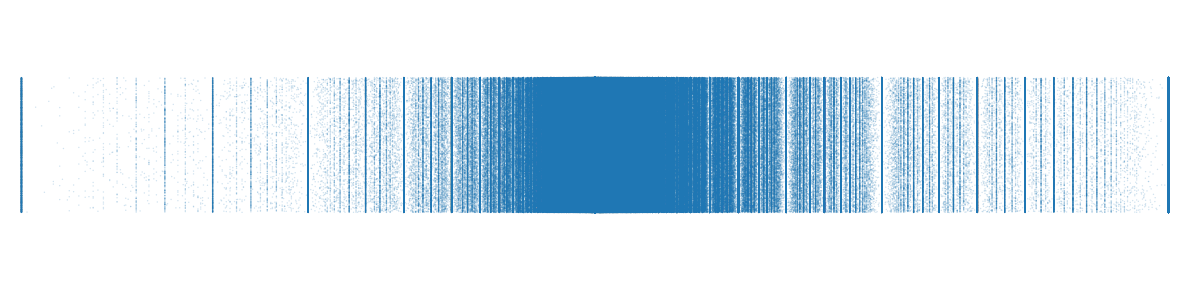

In [15]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

# plot
sns.stripplot(x="cd_5",
              size=1,
              jitter=0.25,
              data=patentsview_df,
              alpha=0.2,
              ax=ax,
              color="#1f77b4")
ax.margins(x=0.01)

# turn off ticks
plt.axis("off")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_1b_patents.pdf")

# Figure 2

### Average $CD_5$ (Panel B)

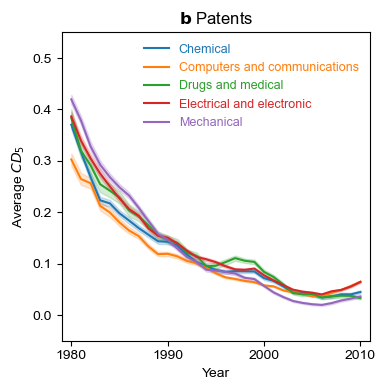

In [16]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_df,
             x="grant_year",
             y="cd_5",
             hue="field_nber_category_id",
             hue_order=config.CATEGORY_ORDER,
             ax=ax)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(-0.05, 0.55)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_5$")
ax.set_title(r"$\bf{b}$ Patents", 
             loc="center")

# get rid of extra space
plt.tight_layout()

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# save
plt.savefig(config.OUTPUT_PATH + "figure_2_panel_b.pdf",
            bbox_inches="tight")

# Figure 3

### Unique words/Total words (Panel D)

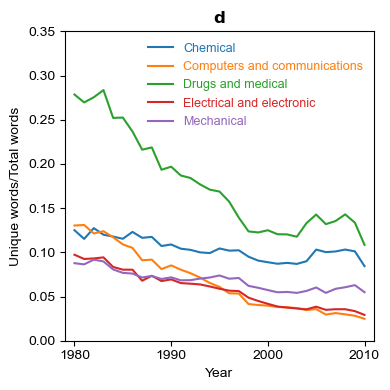

In [17]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(patentsview_category_panel_general_df.groupby(["grant_year",
                                                "category_id"])["titles_ttr"]
                                      .mean()
                                      .unstack()
                                      .plot(ax=ax))
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(0, 0.35)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Unique words/Total words")
ax.set_title(r"$\bf{d}$",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "figure_3_panel_d.pdf")

### New word pairs/Total word pairs (Panel E)

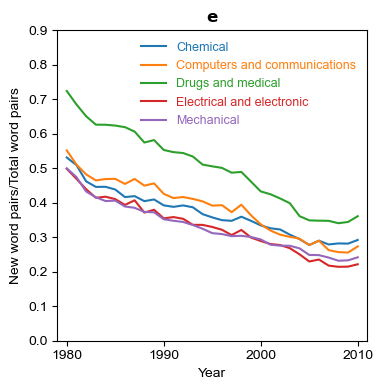

In [18]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(patentsview_category_panel_general_df.groupby(["grant_year",
                                                "category_id"])["upts_titles_sp_tok_pairs_new_t_frac"]
                                      .mean()
                                      .unstack()
                                      .plot(ax=ax))
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(0.0, 0.9)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("New word pairs/Total word pairs")
ax.set_title(r"$\bf{e}$",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "figure_3_panel_e.pdf")

### Verb use per 100 verbs (Panel F)

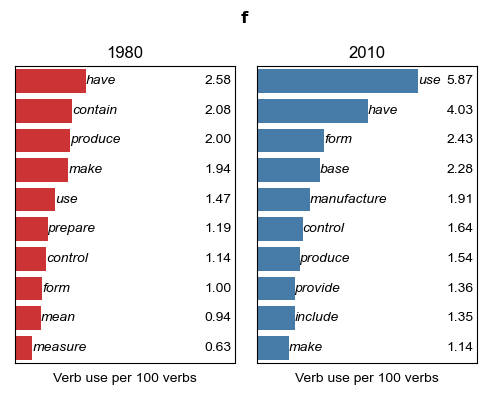

In [19]:
# initialize figure
fig, axs = plt.subplots(1, 2, figsize=(5,4))
axs = axs.flat

# plot 1980
sns.barplot(data=patent_tokens_table_df,
            y="token_d1980",
            x="nrp100_d1980",
            color="#e41a1c",
            ax=axs[0])
axs[0].set_xlim(0,8)
axs[0].set_xlabel("Verb use per 100 verbs")
axs[0].set_ylabel(None)
axs[0].set_title("1980",
                 loc="center")
axs[0].set_xticks([])
axs[0].set_yticks([])

# add tokens + rates
for i, token in enumerate(patent_tokens_table_df.itertuples()):
  axs[0].text(token.nrp100_d1980,
              i,
              token.token_d1980,
              va="center",
              style="italic")
  axs[0].text(6.9,
              i,
              "%.2f" % token.nrp100_d1980,
              va="center")

# plot 2010
sns.barplot(data=patent_tokens_table_df,
            y="token_d2010",
            x="nrp100_d2010",
            color="#377eb8",
            ax=axs[1])
axs[1].set_xlim(0,8)
axs[1].set_xlabel("Verb use per 100 verbs")
axs[1].set_ylabel(None)
axs[1].set_title("2010",
                 loc="center")
axs[1].set_xticks([])
axs[1].set_yticks([])

# add tokens + rates
for i, token in enumerate(patent_tokens_table_df.itertuples()):
  axs[1].text(token.nrp100_d2010,
              i,
              token.token_d2010,
              va="center",
              style="italic")
  axs[1].text(6.9,
              i,
              "%.2f" % token.nrp100_d2010,
              va="center")

# add overall title
fig.suptitle(r"$\bf{f}$",
             y=0.975)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_3_panel_f.pdf",
            bbox_inches="tight")

# Figure 4

### Conservation of high disruption (Panel B)

In [20]:
# set bins
d_5_bins = pd.IntervalIndex.from_tuples([(0.00, 0.25),
                                         (0.25, 0.50),
                                         (0.50, 0.75),
                                         (0.75, 1.00)], closed="right")
c_5_bins = pd.IntervalIndex.from_tuples([(-1.00, -0.75),
                                         (-0.75, -0.50),
                                         (-0.50, -0.25),
                                         (-0.25, 0.00)], closed="left")

In [21]:
# assign bins
patentsview_df["d_5_bins"] = pd.cut(patentsview_df["cd_5"],
                                    d_5_bins)
patentsview_df["c_5_bins"] = pd.cut(patentsview_df["cd_5"],
                                    c_5_bins)

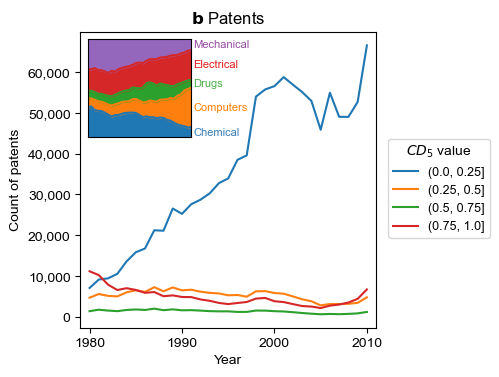

In [22]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(patentsview_df.groupby(["grant_year",
                         "d_5_bins"])["patent_id"]
               .count()
               .unstack()
               .plot(ax=ax,
                     legend=False))
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_aspect(1/ax.get_data_ratio())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("Year")
ax.set_ylabel("Count of patents")
ax.set_title(r"$\bf{b}$ Patents",
             loc="center")

# inset axis
iaxs = ax.inset_axes([0.025,0.635,0.35,0.35])
iaxs_df = patentsview_df[patentsview_df.cd_5>0.25].groupby(["grant_year",
                                                            "field_nber_category_id"])["patent_id"].count().unstack()
iaxs_df = iaxs_df.divide(iaxs_df.sum(axis=1),
                         axis=0)
iaxs_df.plot.area(ax=iaxs,
                  legend=False)
iaxs.margins(0, 0)
iaxs.set_xlabel(None)
iaxs.set_ylabel(None)
iaxs.set_xticks([])
iaxs.set_yticks([])
iaxs.set_aspect(1/iaxs.get_data_ratio())
iaxs.set_ylim(0, 1)

# field labels for inset
ax.text(1991.25, 66000, "Mechanical", fontsize=8, color="#984ea3")
ax.text(1991.25, 61000, "Electrical", fontsize=8, color="#e41a1c")
ax.text(1991.25, 56500, "Drugs", fontsize=8, color="#4daf4a")
ax.text(1991.25, 50500, "Computers", fontsize=8, color="#ff7f00")
ax.text(1991.25, 44500, "Chemical", fontsize=8, color="#377eb8")

# configure legend labels                                                             
legend_handles, legend_labels = ax.get_legend_handles_labels()

# legend
bbox_to_anchor = (1.25,0.5)
lgd = fig.legend(legend_handles,
                 legend_labels,
                 ncol = 1,
                 bbox_to_anchor=bbox_to_anchor,
                 loc="center right",
                 title="$CD_5$ value",
                 fontsize=config.LEGEND_FONTSIZE,
                 frameon=True)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_4_panel_b.pdf",
            bbox_extra_artists=(lgd,),
            bbox_inches="tight")

# Figure 5
Not applicable for patents.

# Figure 6

### Diversity of work cited (Panel D, D1, D2)

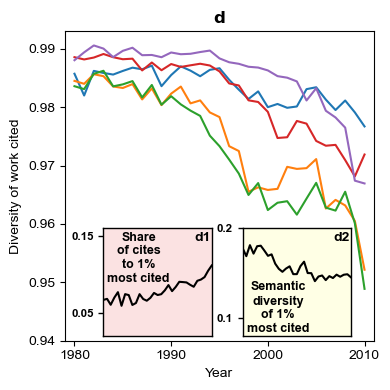

In [23]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(patentsview_category_panel_general_df.groupby(["grant_year",
                                                "category_id"])["upatents_cited_nentropy_t"]
                                      .mean()
                                      .unstack()
                                      .plot(ax=ax,
                                            legend=False))
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(0.94, 0.993)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Diversity of work cited")
ax.set_title(r"$\bf{d}$", 
             loc="center")

# inset axis 1
iax1 = ax.inset_axes([0.125,0.015,0.35,0.35])
(patentsview_category_panel_general_df.groupby(["grant_year",])["top_1pct_cite_share"]
                                      .mean()
                                      .plot(ax=iax1,
                                            color="#000000",
                                            legend=False))
iax1.set_yticks([0.05,0.15])
iax1.set_yticklabels([0.05,0.15],
                     fontsize="small")
iax1.set_ylim(0.02, 0.16)
iax1.set_xlim(1980, 2010)
iax1.set_aspect(1/iax1.get_data_ratio())
iax1.set_xlabel(None)
iax1.set_ylabel(None)
iax1.set_xticks([])
iax1.set_facecolor("#e41a1c20")

# add annotations
iax1.text(0.835, 
          0.875, 
          "d1", 
          fontsize=10, 
          weight="bold", 
          transform=iax1.transAxes)
iax1.text(0.325, 
          0.5, 
          "Share\nof cites\nto 1%\nmost cited", 
          fontsize=9, 
          weight="bold", 
          transform=iax1.transAxes, 
          ha="center")

# thicken borders
[x.set_linewidth(1) for x in iax1.spines.values()]
iax1.xaxis.set_tick_params(width=1)
iax1.yaxis.set_tick_params(width=1)
labels = iax1.get_xticklabels() + iax1.get_yticklabels()
[label.set_fontweight("bold") for label in labels]

# inset axis 2
iax2 = ax.inset_axes([0.575,0.015,0.35,0.35])
(patentsview_category_panel_general_df.groupby(["grant_year",])["ttl_coef_var"]
                                      .mean()
                                      .plot(ax=iax2,
                                            color="#000000",
                                            legend=False))
iax2.set_yticks([0.10,0.20])
iax2.set_yticklabels([0.10,0.20],
                     fontsize="small")
iax2.set_ylim(0.08, 0.20)
iax2.set_xlim(1980, 2010)
iax2.set_aspect(1/iax2.get_data_ratio())
iax2.set_xlabel(None)
iax2.set_ylabel(None)
iax2.set_xticks([])
iax2.set_facecolor("#ffffe5")

# add annotations
iax2.text(0.835, 
          0.875, 
          "d2", 
          fontsize=10, 
          weight="bold", 
          transform=iax2.transAxes)
iax2.text(0.325, 
          0.035, "Semantic\ndiversity\nof 1%\nmost cited", 
          fontsize=9, 
          weight="bold", 
          transform=iax2.transAxes, 
          ha="center")

# thicken borders
[x.set_linewidth(1) for x in iax2.spines.values()]
iax2.xaxis.set_tick_params(width=1)
iax2.yaxis.set_tick_params(width=1)
labels = iax2.get_xticklabels() + iax2.get_yticklabels()
[label.set_fontweight("bold") for label in labels]

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_6_panel_d_d1_d2.pdf", 
            bbox_inches="tight")

### Mean self-citations per patent (Panel E)

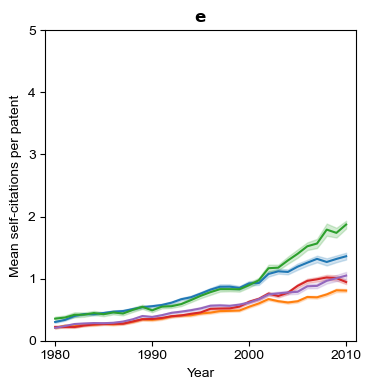

In [24]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_df[patentsview_df.cited_self_risk == 1], 
             x="grant_year", 
             y="cited_self",
             hue="field_nber_category_id",
             hue_order=config.CATEGORY_ORDER,
             ax=ax,
             legend=False)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(0, 5)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Mean self-citations per patent")
ax.set_title(r"$\bf{e}$", 
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_6_panel_e.pdf", 
            bbox_inches="tight")

### Mean age of work cited (Panel F)

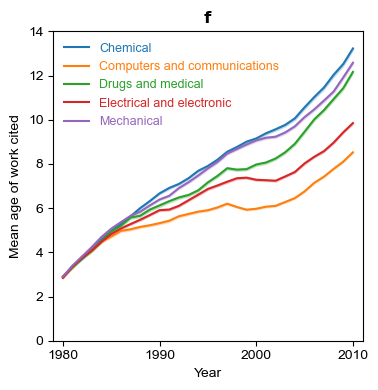

In [25]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_df, 
             x="grant_year", 
             y="cited_age_mean",
             hue="field_nber_category_id",
             hue_order=config.CATEGORY_ORDER,
             ax=ax)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(0, 14)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Mean age of work cited")
ax.set_title(r"$\bf{f}$", 
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR,
           loc="upper left")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_6_panel_f.pdf", 
            bbox_inches="tight")

# Extended Data Figure 1

### Distribution of $CD_5$ (Panel C)

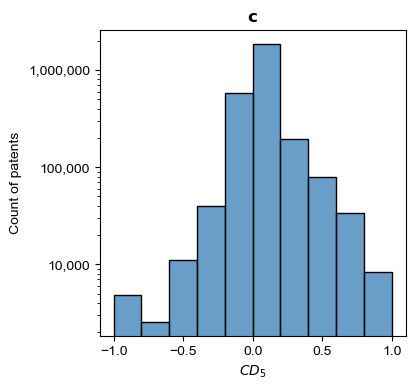

In [26]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# plot
sns.histplot(x="cd_5",
             data=patentsview_df,
             binwidth=0.2,
             stat="count",
             color="#377eb8",
             ax=ax)
ax.set_yscale("log")
ax.set_aspect(1/ax.get_data_ratio())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("$CD_5$")
ax.set_ylabel("Count of patents")
ax.set_title(r"$\bf{c}$",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_1_panel_c.pdf",
            bbox_inches="tight")

### Distribution of $CD_5$ (Panel D)

In [27]:
# set decade bins (patents)
patentsview_df = patentsview_df.assign(grant_year_5yrs = pd.cut(patentsview_df.grant_year, 
                                                         pd.IntervalIndex.from_tuples([(1980, 1985), 
                                                                                       (1985, 1990), 
                                                                                       (1990, 1995), 
                                                                                       (1995, 2000), 
                                                                                       (2000, 2005), 
                                                                                       (2005, 2010),])))

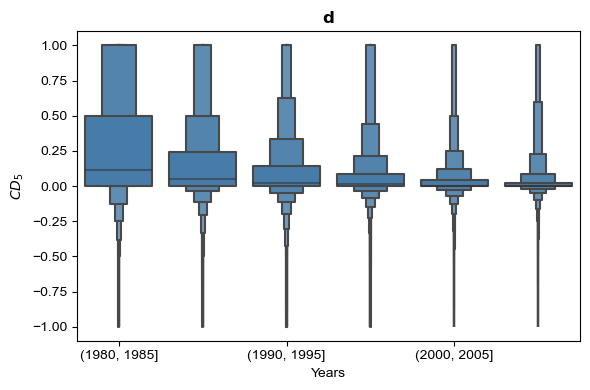

In [28]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# plot
sns.boxenplot(x="grant_year_5yrs",
              y="cd_5",
              color="#377eb8",
              data=patentsview_df,
              ax=ax)
ax.set_xlabel("Years")
ax.set_ylabel("$CD_5$")
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_title(r"$\bf{d}$",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_1_panel_d.pdf",
            bbox_inches="tight")

# Extended Data Figure 2

### CD index measured 10 years post publication (Panel C)

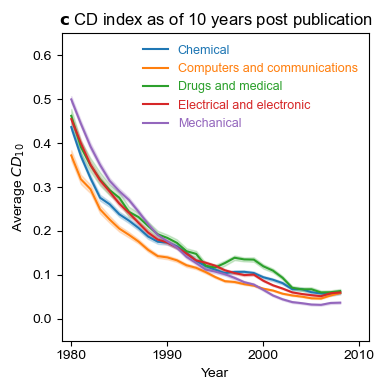

In [29]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_df,
             x="grant_year",
             y="cd_10",
             hue="field_nber_category_id",
             hue_order=config.CATEGORY_ORDER,
             ax=ax)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(-0.05, 0.65)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_{10}$")
ax.set_title(r"$\bf{c}$ CD index as of 10 years post publication",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_2_panel_c.pdf",
            bbox_inches="tight")

### CD index measured as of 2017 (Panel D)

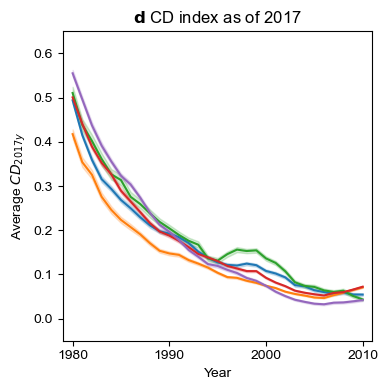

In [30]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_df,
             x="grant_year",
             y="cd_2017y",
             hue="field_nber_category_id",
             hue_order=config.CATEGORY_ORDER,
             ax=ax,
             legend=None)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(-0.05, 0.65)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_{2017y}$")
ax.set_title(r"$\bf{d}$ CD index as of 2017",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_2_panel_d.pdf",
            bbox_inches="tight")

# Extended Data Figure 3

### Unique words/Total words (Panel B)

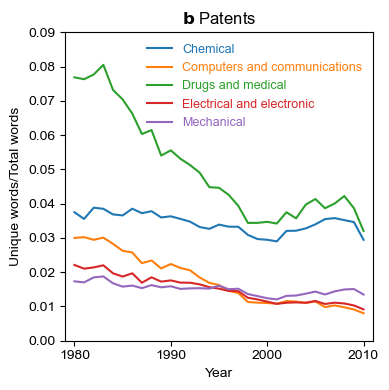

In [31]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(patentsview_category_panel_general_df.groupby(["grant_year",
                                       "category_id"])["abstracts_ttr"]
                                       .mean()
                                       .unstack()
                                       .plot(ax=ax))
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(0, 0.09)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Unique words/Total words")
ax.set_title(r"$\bf{b}$ Patents",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_3_panel_b.pdf",
            bbox_inches="tight")

# Extended Data Figure 4

### Declining combinatorial novelty (Panel B)

In [32]:
# set decade bins (patents)
patentsview_df = patentsview_df.assign(grant_year_decade = pd.cut(patentsview_df.grant_year, 
                                                         pd.IntervalIndex.from_tuples([(1980, 1990), 
                                                                                       (1990, 2000), 
                                                                                       (2000, 2010),])))

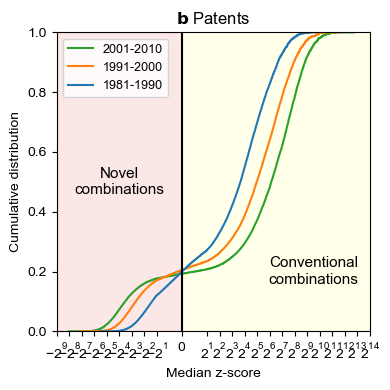

In [33]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(config.STANDARD_FIGSIZE))

# plot
sns.ecdfplot(data=patentsview_df,
             x="zscores_median",
             hue="grant_year_decade",
             ax=ax)
ax.axvline(x=0,
           color="black")
ax.axvspan(-2**9, 0,
           alpha=0.1,
           color="#e41a1c")
ax.axvspan(0, 
           2**14,
           alpha=0.1,
           color="#ffff33")
ax.set_ylim(0, 1)
ax.set_xscale("symlog",
              base=2)
ax.set_xlim(-2**9,
            2**14)
ax.set_xlabel("Median z-score")
ax.set_ylabel("Cumulative distribution")
ax.set_title(r"$\bf{b}$ Patents", 
             loc="center")
ax.legend(["1981-1990",
               "1991-2000",
               "2001-2010"][::-1],
          loc="upper left",
          ncol=1,
          fancybox=True,
          shadow=False,
          fontsize=config.LEGEND_FONTSIZE,
          frameon=True)
ax.text(2**9.5,
        0.2,
        "Conventional\ncombinations",
        ha="center",
        va="center",
        fontsize=11)
ax.text(-2**4,
        0.5,
        "Novel\ncombinations",
        ha="center",
        va="center",
        fontsize=11)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_4_panel_b.pdf",
            bbox_inches="tight")

# Extended Data Figure 5

### Contribution of field, year, and author effects

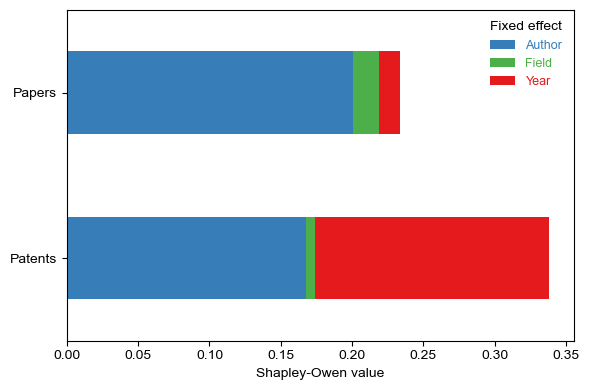

In [34]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# plot
(shapley_decomposition_df.pivot(index="type",
                                columns="predictor",
                                values="shapley")
                         .sort_values("type",
                                      ascending=False)
                         .plot
                         .barh(stacked=True,
                               color=["#377eb8",
                                      "#4daf4a",
                                      "#e41a1c"],
                               ax=ax))
ax.set_ylabel(None)
ax.set_xlabel("Shapley-Owen value")

# add the legend
plt.legend(title="Fixed effect",
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_5.pdf",
            bbox_inches="tight")

# Extended Data Figure 6

### CD index over time across other data sources

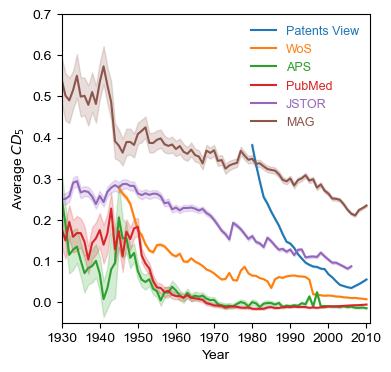

In [35]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=unified_cdindex_df,
             x="year",
             y="cd_5",
             hue="source",
             ax=ax)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks([1930, 1940, 1950, 1960, 1970] + config.PATENT_YEAR_TICKS)
ax.set_ylim(-0.05, 0.7)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_5$")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_6.pdf",
            bbox_inches="tight")

# Extended Data Figure 7

### Alternative measures of disruption (Panel B)

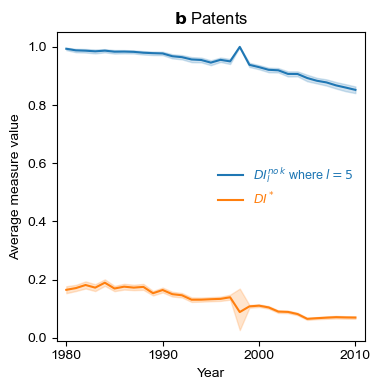

In [36]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_cdindex_bornmann_analytical_df,
             x="grant_year",
             y="value",
             hue="variable",
             ax=ax)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(-0.01, 1.05)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average measure value")
ax.set_title(r"$\bf{b}$ Patents",
                loc="center")

# add the legend
ax.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_7_panel_b.pdf",
            bbox_inches="tight")

# Extended Data Figure 8

### Paper/patent and field $\times$ year normalized versions of the $CD_5$ index (Panel E)

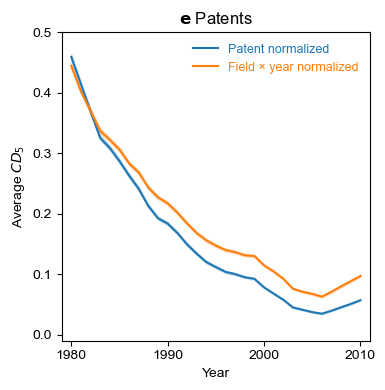

In [37]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_cdindex_normalized_analytical_df,
             x="grant_year",
             y="value",
             hue="variable",
             ax=ax)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(-0.01, 0.5)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_5$")
ax.set_title(r"$\bf{e}$ Patents",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_8_panel_e.pdf",
            bbox_inches="tight")

### Predicted values of the $CD_5$ index by year after adjusting for patterns in publication, citation, and authorship practices (Panel E)

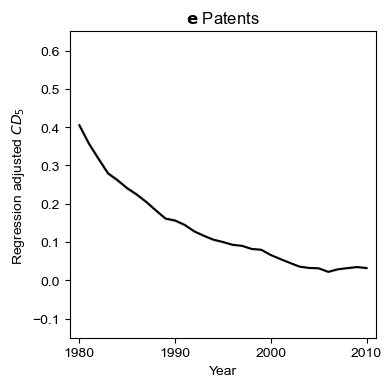

In [38]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
ax.plot(patents_regadj_m4_df.year,
        patents_regadj_m4_df.cd_5_adj,
        color="#000000")
ax.fill_between(patents_regadj_m4_df.year,
                (patents_regadj_m4_df.ci_lower),
                (patents_regadj_m4_df.ci_upper),
                color="#cccccc",
                alpha=0.5)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(-0.15, 0.65)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Regression adjusted $CD_5$")
ax.set_title(r"$\bf{e}$ Patents",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_8_panel_e.pdf",
            bbox_inches="tight")

### Comparison of the observed values of the $CD_5$ index to those obtained from randomly rewired citation networks (Panel F)

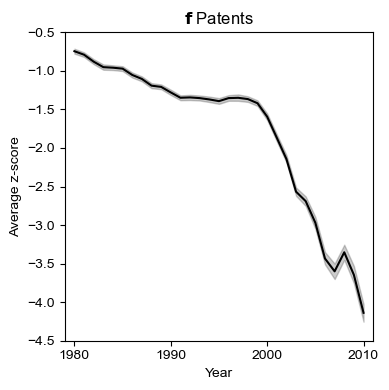

In [39]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=patentsview_rewired_df,
             x="grant_year",
             y="cd_5_zscore",
             color="#000000",
             ax=ax)
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(-4.5, -0.5)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average z-score")
ax.set_title(r"$\bf{f}$ Patents",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_8_panel_f.pdf",
            bbox_inches="tight")

# Extended Data Figure 9

### Growth of scientific and technological knowledge (Panel B)

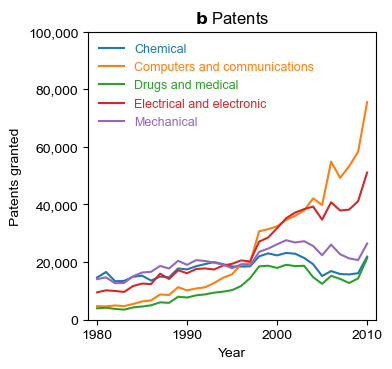

In [40]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(patentsview_df.groupby(["grant_year",
                         "field_nber_category_id"])["patent_id"]
            .count()
            .unstack()
            .plot(ax=ax,
                  legend=True))
ax.set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax.set_xticks(config.PATENT_YEAR_TICKS)
ax.set_ylim(0, 100000)
ax.set_aspect(1/ax.get_data_ratio())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("Year")
ax.set_ylabel("Patents granted")
ax.set_title(r"$\bf{b}$ Patents",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_9_panel_b.pdf",
            bbox_inches="tight")